In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind, t
from matplotlib.ticker import PercentFormatter
from pathlib import Path

In [2]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
sns.set_theme(style="darkgrid")

# Cleaning and formatting

In [4]:
DATA_DIR = Path("./data").resolve()

qvi_data = DATA_DIR / "QVI_cleaned.csv"

print(qvi_data)

D:\Users\Esperine\Workspace3\esper-datalab-main\forage_quantium\data\QVI_cleaned.csv


In [5]:
df_main = pd.read_csv(qvi_data, parse_dates=True)
df_main.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,PROD_UPRICE,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag,2.0,11.8,380.0,5.9,SMITHS,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn Friedchicken,2.0,7.4,134.0,3.7,PRINGLES,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55.0,55073.0,48884.0,91.0,Ccs Tasty Cheese,2.0,4.2,175.0,2.1,CCS,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil Pesto,2.0,10.8,175.0,5.4,KETTLE,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light Tangy,2.0,6.6,175.0,3.3,THINS,MIDAGE SINGLES/COUPLES,Budget


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246741 entries, 0 to 246740
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              246741 non-null  object 
 1   STORE_NBR         246740 non-null  float64
 2   LYLTY_CARD_NBR    246740 non-null  float64
 3   TXN_ID            246740 non-null  float64
 4   PROD_NBR          246740 non-null  float64
 5   PROD_NAME         246740 non-null  object 
 6   PROD_QTY          246740 non-null  float64
 7   TOT_SALES         246740 non-null  float64
 8   PROD_WT           246740 non-null  float64
 9   PROD_UPRICE       246740 non-null  float64
 10  PROD_BRAND        246740 non-null  object 
 11  LIFESTAGE         246740 non-null  object 
 12  PREMIUM_CUSTOMER  246740 non-null  object 
dtypes: float64(8), object(5)
memory usage: 24.5+ MB


In [7]:
df_main["DATE"] = pd.to_datetime(df_main["DATE"])
df_main = df_main.astype({
    "STORE_NBR": "Int64",
    "LYLTY_CARD_NBR": "Int64",
    "TXN_ID": "Int64",
    "PROD_NBR": "Int64",
    "PROD_QTY": "Int64",
    "PROD_WT": "Int64"
})
df_main["YEARMONTH"] = df_main["DATE"].dt.to_period("M")
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246741 entries, 0 to 246740
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246741 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  Int64         
 2   LYLTY_CARD_NBR    246740 non-null  Int64         
 3   TXN_ID            246740 non-null  Int64         
 4   PROD_NBR          246740 non-null  Int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  Int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PROD_WT           246740 non-null  Int64         
 9   PROD_UPRICE       246740 non-null  float64       
 10  PROD_BRAND        246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
 13  YEARMONTH         246741 non-null  period[M]     
dtypes: I

In [8]:
df_main.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,PROD_UPRICE,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380,5.9,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2018-07
1,2018-07-01,55,55073,48884,99,Pringles Sthrn Friedchicken,2,7.4,134,3.7,PRINGLES,MIDAGE SINGLES/COUPLES,Budget,2018-07
2,2018-07-01,55,55073,48884,91,Ccs Tasty Cheese,2,4.2,175,2.1,CCS,MIDAGE SINGLES/COUPLES,Budget,2018-07
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil Pesto,2,10.8,175,5.4,KETTLE,MIDAGE SINGLES/COUPLES,Budget,2018-07
4,2018-07-01,68,68193,65598,44,Thins Chips Light Tangy,2,6.6,175,3.3,THINS,MIDAGE SINGLES/COUPLES,Budget,2018-07


In [9]:
df_main.dropna(inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 246740
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  Int64         
 2   LYLTY_CARD_NBR    246740 non-null  Int64         
 3   TXN_ID            246740 non-null  Int64         
 4   PROD_NBR          246740 non-null  Int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  Int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PROD_WT           246740 non-null  Int64         
 9   PROD_UPRICE       246740 non-null  float64       
 10  PROD_BRAND        246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
 13  YEARMONTH         246740 non-null  period[M]     
dtypes: Int64(

# Analysis proper

## Setup monthly measures of metrics per store

In [10]:
# Total transactions per month for every store

monthly_trans = df_main.pivot_table(
    index="STORE_NBR", 
    columns="YEARMONTH", 
    aggfunc="size", 
    fill_value=0
).rename_axis(None, axis=1)

print(monthly_trans.shape)
monthly_trans

(271, 12)


,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,49,41,59,40,45,40,35,51,47,40,48,40
2,38,39,33,41,34,35,43,31,41,45,47,38
3,134,124,118,117,111,124,114,134,126,102,113,117
4,152,144,135,148,127,128,156,97,127,130,112,129
5,111,99,122,98,103,112,108,103,86,101,94,117
...,...,...,...,...,...,...,...,...,...,...,...,...
268,50,50,30,46,46,39,35,36,44,45,48,38
269,131,127,117,142,125,119,133,123,117,129,117,114
270,124,143,115,104,121,140,146,116,137,122,119,114


In [11]:
# Check if there are stores with little to no sales

monthly_trans[((monthly_trans == 0) | (monthly_trans == np.nan)).any(axis=1)]

,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
11,0,0,0,1,0,1,0,0,0,0,0,0
31,0,0,1,0,1,0,0,0,0,0,0,0
44,4,0,3,5,4,7,5,3,5,3,6,8
76,0,0,0,1,0,0,0,0,0,0,0,0
85,2,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
117,0,4,3,6,6,8,0,2,2,4,4,2
177,3,6,5,1,10,2,9,2,4,0,1,8
193,0,0,0,0,0,0,1,1,0,0,0,1


In [12]:
drop_stores = monthly_trans[((monthly_trans == 0) | (monthly_trans == np.nan)).any(axis=1)].index
print(drop_stores, drop_stores.shape)

Index([11, 31, 44, 76, 85, 92, 117, 177, 193, 206, 218, 252], dtype='Int64', name='STORE_NBR') (12,)


In [13]:
monthly_trans = monthly_trans.drop(index=drop_stores).reset_index()
print(monthly_trans.shape)
monthly_trans

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,49,41,59,40,45,40,35,51,47,40,48,40
1,2,38,39,33,41,34,35,43,31,41,45,47,38
2,3,134,124,118,117,111,124,114,134,126,102,113,117
3,4,152,144,135,148,127,128,156,97,127,130,112,129
4,5,111,99,122,98,103,112,108,103,86,101,94,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,268,50,50,30,46,46,39,35,36,44,45,48,38
255,269,131,127,117,142,125,119,133,123,117,129,117,114
256,270,124,143,115,104,121,140,146,116,137,122,119,114
257,271,117,91,104,106,108,108,106,93,96,97,117,123


In [14]:
# Save list of all active stores for later use and reference

all_stores = monthly_trans["STORE_NBR"]
all_stores

0        1
1        2
2        3
3        4
4        5
      ... 
254    268
255    269
256    270
257    271
258    272
Name: STORE_NBR, Length: 259, dtype: Int64

In [15]:
# Total sales per month for every store

monthly_sales = df_main.pivot_table(
    values="TOT_SALES",
    index="STORE_NBR", 
    columns="YEARMONTH",
    aggfunc="sum",
    fill_value=0
).rename_axis(None, axis=1).drop(index=drop_stores).reset_index()

print(monthly_sales.shape)
monthly_sales.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,188.9,168.40,268.1,175.4,184.8,160.6,149.7,194.7,185.2,177.4,207.10,163.6
1,2,140.5,180.90,133.9,160.1,143.3,129.2,158.7,136.8,174.0,173.4,179.80,143.4
2,3,1164.9,998.15,1011.3,1017.5,936.6,1075.7,980.3,1146.7,1083.6,843.5,905.10,986.3
3,4,1318.3,1188.10,1168.0,1275.0,1089.6,1134.6,1402.6,832.4,1110.8,1159.1,885.75,1145.0
4,5,763.8,654.50,875.2,740.6,707.0,800.2,772.6,706.4,603.4,684.4,665.50,828.6


In [16]:
# Total product units sold per month for every store

monthly_units_sold = df_main.pivot_table(
    values="PROD_QTY",
    index="STORE_NBR", 
    columns="YEARMONTH",
    aggfunc="sum",
    fill_value=0
).rename_axis(None, axis=1).drop(index=drop_stores).reset_index()

print(monthly_units_sold.shape)
monthly_units_sold.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,58,52,71,51,55,48,41,58,56,52,62,50
1,2,43,50,36,43,38,37,47,36,46,50,53,40
2,3,263,237,230,231,213,246,222,262,247,192,213,228
3,4,302,276,270,296,254,256,311,194,254,259,202,258
4,5,222,189,244,196,206,224,216,206,172,202,184,234


In [17]:
# Total unique transactions per month for every store (refers to total number of customers in the store)

monthly_utrans = df_main.pivot_table(
    values="LYLTY_CARD_NBR",
    index="STORE_NBR", 
    columns="YEARMONTH",
    aggfunc="nunique",
    fill_value=0
).rename_axis(None, axis=1).drop(index=drop_stores).reset_index()

print(monthly_utrans.shape)
monthly_utrans.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,47,41,57,39,44,37,35,49,43,39,43,39
1,2,36,35,32,39,33,32,41,28,40,43,45,36
2,3,108,106,102,103,95,107,97,113,106,85,100,102
3,4,121,118,117,119,109,102,125,86,111,112,94,116
4,5,86,85,99,81,80,90,84,85,76,78,78,95


In [18]:
# Average number of transactions per customer per month for every store

monthly_avg_trans_per_cust = (
    df_main.groupby(["STORE_NBR", "YEARMONTH"])["LYLTY_CARD_NBR"]
        .agg(["size", "nunique"])
        .pipe(lambda df: df["size"].div(df["nunique"], fill_value=0))
        .unstack()
        .rename_axis(None, axis=1)
        .drop(index=drop_stores)
        .reset_index()
)

print(monthly_avg_trans_per_cust.shape)
monthly_avg_trans_per_cust.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,1.042553,1.0,1.035088,1.025641,1.022727,1.081081,1.0,1.040816,1.093023,1.025641,1.116279,1.025641
1,2,1.055556,1.114286,1.03125,1.051282,1.030303,1.09375,1.04878,1.107143,1.025,1.046512,1.044444,1.055556
2,3,1.240741,1.169811,1.156863,1.135922,1.168421,1.158879,1.175258,1.185841,1.188679,1.2,1.13,1.147059
3,4,1.256198,1.220339,1.153846,1.243697,1.165138,1.254902,1.248,1.127907,1.144144,1.160714,1.191489,1.112069
4,5,1.290698,1.164706,1.232323,1.209877,1.2875,1.244444,1.285714,1.211765,1.131579,1.294872,1.205128,1.231579


In [19]:
# Average number of purchased product per customer per month for every store

monthly_avg_units_per_cust = (
    df_main.groupby(["STORE_NBR", "YEARMONTH"])
        .agg(
            total_qty=("PROD_QTY", "sum"),
            unique_cust=("LYLTY_CARD_NBR", "nunique")
        )
        .pipe(lambda df: df["total_qty"].div(df["unique_cust"], fill_value=0))
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .drop(index=drop_stores)
        .reset_index()
)

print(monthly_avg_units_per_cust.shape)
monthly_avg_units_per_cust.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,1.234043,1.268293,1.245614,1.307692,1.25,1.297297,1.171429,1.183673,1.302326,1.333333,1.44186,1.282051
1,2,1.194444,1.428571,1.125,1.102564,1.151515,1.15625,1.146341,1.285714,1.15,1.162791,1.177778,1.111111
2,3,2.435185,2.235849,2.254902,2.242718,2.242105,2.299065,2.28866,2.318584,2.330189,2.258824,2.13,2.235294
3,4,2.495868,2.338983,2.307692,2.487395,2.330275,2.509804,2.488,2.255814,2.288288,2.3125,2.148936,2.224138
4,5,2.581395,2.223529,2.464646,2.419753,2.575,2.488889,2.571429,2.423529,2.263158,2.589744,2.358974,2.463158


In [20]:
# Average number of purchased product per transactions per month for every store

monthly_avg_units_per_trans = (
    df_main.groupby(["STORE_NBR", "YEARMONTH"])["PROD_QTY"]
        .mean()
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .drop(index=drop_stores)
        .reset_index()
)

print(monthly_avg_units_per_trans.shape)
monthly_avg_units_per_trans.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,1.183673,1.268293,1.20339,1.275,1.222222,1.2,1.171429,1.137255,1.191489,1.3,1.291667,1.25
1,2,1.131579,1.282051,1.090909,1.04878,1.117647,1.057143,1.093023,1.16129,1.121951,1.111111,1.12766,1.052632
2,3,1.962687,1.91129,1.949153,1.974359,1.918919,1.983871,1.947368,1.955224,1.960317,1.882353,1.884956,1.948718
3,4,1.986842,1.916667,2.0,2.0,2.0,2.0,1.99359,2.0,2.0,1.992308,1.803571,2.0
4,5,2.0,1.909091,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.957447,2.0


In [21]:
# Average price per unit per month for every store

monthly_avg_uprice = (
    df_main.groupby(["STORE_NBR", "YEARMONTH"])
        .agg(
            total_sales=("TOT_SALES", "sum"),
            total_qty=("PROD_QTY", "sum")
        )
        .pipe(lambda df: df["total_sales"].div(df["total_qty"], fill_value=0))
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .drop(index=drop_stores)
        .reset_index()
)

print(monthly_avg_uprice.shape)
monthly_avg_uprice.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,3.256897,3.238462,3.776056,3.439216,3.36,3.345833,3.65122,3.356897,3.307143,3.411538,3.340323,3.272
1,2,3.267442,3.618,3.719444,3.723256,3.771053,3.491892,3.376596,3.8,3.782609,3.468,3.392453,3.585
2,3,4.429278,4.211603,4.396957,4.404762,4.397183,4.372764,4.415766,4.376718,4.387045,4.393229,4.249296,4.325877
3,4,4.365232,4.30471,4.325926,4.307432,4.289764,4.432031,4.509968,4.290722,4.373228,4.47529,4.384901,4.437984
4,5,3.440541,3.462963,3.586885,3.778571,3.432039,3.572321,3.576852,3.429126,3.50814,3.388119,3.616848,3.541026


In [22]:
# Create summary for later use and reference

all_metrics = [
    monthly_trans,
    monthly_sales,
    monthly_units_sold,
    monthly_utrans,
    monthly_avg_trans_per_cust,
    monthly_avg_units_per_cust,
    monthly_avg_units_per_trans,
    monthly_avg_uprice
]

column_names = [
    "TRANS", 
    "SALES", 
    "UNITS_SOLD", 
    "UNIQUE_TRANS", 
    "TRANS_PER_CUST", 
    "UNITS_SOLD_PER_CUST",
    "UNITS_SOLD_PER_TRANS",
    "UNIT_PRICE"
]

store_metrics_summary = pd.concat(
    [df.set_index("STORE_NBR").mean(axis=1) for df in all_metrics],
    axis=1,
    keys=column_names
).reset_index()

trial_stores = (77, 86, 88)
summary_metrics_trial_stores = store_metrics_summary[store_metrics_summary["STORE_NBR"].isin(trial_stores)]
summary_metrics_other_stores = store_metrics_summary[~store_metrics_summary["STORE_NBR"].isin(trial_stores)]

In [23]:
summary_metrics_trial_stores.round(3)

,STORE_NBR,TRANS,SALES,UNITS_SOLD,UNIQUE_TRANS,TRANS_PER_CUST,UNITS_SOLD_PER_CUST,UNITS_SOLD_PER_TRANS,UNIT_PRICE
72,77,44.083,236.600,67.833,42.167,1.047,1.616,1.543,3.497
80,86,119.917,834.229,238.917,97.583,1.23,2.45,1.992,3.493
82,88,148.833,1287.154,295.333,121.500,1.225,2.431,1.984,4.358


In [24]:
summary_metrics_other_stores.round(3)

,STORE_NBR,TRANS,SALES,UNITS_SOLD,UNIQUE_TRANS,TRANS_PER_CUST,UNITS_SOLD_PER_CUST,UNITS_SOLD_PER_TRANS,UNIT_PRICE
0,1,44.583,185.325,54.5,42.750,1.042,1.276,1.225,3.396
1,2,38.750,154.500,43.25,36.667,1.059,1.183,1.116,3.583
2,3,119.500,1012.471,232.0,102.000,1.171,2.273,1.94,4.363
3,4,132.083,1142.438,261.0,110.833,1.19,2.349,1.974,4.375
4,5,104.500,733.517,207.917,84.750,1.233,2.452,1.989,3.528
...,...,...,...,...,...,...,...,...,...
254,268,42.250,201.821,56.833,40.250,1.05,1.416,1.346,3.548
255,269,124.500,872.558,247.0,98.833,1.259,2.498,1.984,3.53
256,270,125.083,876.588,248.25,96.667,1.295,2.573,1.986,3.533
257,271,105.500,746.025,208.75,86.083,1.227,2.427,1.979,3.573


## Determine control stores

In [25]:
def store_correlation(trial_store_nbr, select_metric):
    """Measure similarity of stores based on trend. Values close to +1 means the two stores are nearly identical."""
    
    # List all dataframes for each relevant metric
    all_metrics = [
        monthly_trans,
        monthly_sales,
        monthly_units_sold,
        monthly_utrans,
        monthly_avg_trans_per_cust,
        monthly_avg_units_per_cust,
        monthly_avg_units_per_trans,
        monthly_avg_uprice
    ]

    # Get dataframe metric to use for correlation
    df_metric = all_metrics[select_metric].set_index("STORE_NBR")
    trial_store_data = df_metric.loc[trial_store_nbr]

    # To avoid RuntimeWarnings when calculating correlation
    if select_metric in [4, 5]:
        variances = df_metric.std(axis=1)
        df_metric = df_metric.loc[variances > 0]

    # Calculate correlation values of trial store for every other store
    corr_values = df_metric.corrwith(trial_store_data, axis=1)

    # Format result into dataframe
    df_results = (
        corr_values.to_frame(name="CORR")
            .reset_index()
            .rename(columns={"STORE_NBR": "CTRL_STORE"})
            .assign(TRIAL_STORE=trial_store_nbr)
    )

    # Filter correlation value of trial store to itself
    df_results = df_results[df_results["CTRL_STORE"] != trial_store_nbr]

    return df_results.reindex(columns=["TRIAL_STORE", "CTRL_STORE", "CORR"])


def store_magnitude_score(trial_store_nbr, select_metric):
    """Measure similarity of stores based on sales volume. Values close to 1 means the two stores are nearly identical."""
    
    # List all dataframes for each relevant metric
    all_metrics = [
        monthly_trans,
        monthly_sales,
        monthly_units_sold,
        monthly_utrans,
        monthly_avg_trans_per_cust,
        monthly_avg_units_per_cust,
        monthly_avg_units_per_trans,
        monthly_avg_uprice
    ]

    # Get dataframe metric to use for correlation
    df_metric = all_metrics[select_metric].set_index("STORE_NBR")
    trial_store_data = df_metric.loc[trial_store_nbr]

    # Calculate absolute differences between each store and trial store
    df_abs_diff = df_metric.sub(trial_store_data).abs()

    # Get minimum and maximum values from absolute differences
    min_mag, max_mag = df_abs_diff.min(), df_abs_diff.max()

    # Calculate standard score and get average across all months
    std_mag_measure = 1 - (df_abs_diff - min_mag) / (max_mag - min_mag)
    mag_values = std_mag_measure.mean(axis=1)

    # Format result into dataframe
    df_results = (
        mag_values.to_frame(name="MAG_SCORE")
            .reset_index()
            .rename(columns={"STORE_NBR": "CTRL_STORE"})
            .assign(TRIAL_STORE=trial_store_nbr)
    )

    # Filter correlation value of trial store to itself
    df_results = df_results[df_results["CTRL_STORE"] != trial_store_nbr]

    return df_results.reindex(columns=["TRIAL_STORE", "CTRL_STORE", "MAG_SCORE"])

In [26]:
def composite_score(trial_store_nbr, test_metrics):
    # Metrics that are considered the most impactful based on general retail practices
    relevant_metrics = test_metrics
    total_score = pd.Series(0, index=all_stores.index)

    # Calculate total score based on correlation and magnitude score of each metric
    for m in relevant_metrics:
        corr = store_correlation(trial_store_nbr, m)["CORR"]
        mag = store_magnitude_score(trial_store_nbr, m)["MAG_SCORE"]

        total_score += (0.5 * corr + 0.5 * mag) * (1 / len(relevant_metrics))

    # Create the dataframe to return
    df_composite_score = pd.DataFrame({
        "TRIAL_STORE": trial_store_nbr,
        "CTRL_STORE": all_stores,
        "CTRL_SCORE": total_score
    })

    return df_composite_score

In [27]:
# Considering only Metrics 1, 3

for store in trial_stores:
    print(f"Trial Store - {store}")
    print(composite_score(store, test_metrics=[1, 3]).sort_values(by="CTRL_SCORE", ascending=False).head())

print("---")

# Considering only Metrics 1, 3, 7, 8

for store in trial_stores:
    print(f"Trial Store - {store}")
    print(composite_score(store, test_metrics=[1, 3, 6, 7]).sort_values(by="CTRL_SCORE", ascending=False).head())

Trial Store - 77
     TRIAL_STORE  CTRL_STORE  CTRL_SCORE
32            77          35    0.847050
159           77         167    0.841174
49            77          53    0.806832
38            77          41    0.775289
220           77         233    0.774455
Trial Store - 86
     TRIAL_STORE  CTRL_STORE  CTRL_SCORE
216           86         229    0.792039
218           86         231    0.741908
160           86         168    0.735680
139           86         147    0.726439
102           86         109    0.715420
Trial Store - 88
     TRIAL_STORE  CTRL_STORE  CTRL_SCORE
216           88         229    0.678591
80            88          86    0.666323
88            88          95    0.647480
191           88         201    0.645441
6             88           7    0.638049
---
Trial Store - 77
     TRIAL_STORE  CTRL_STORE  CTRL_SCORE
159           77         167    0.736452
49            77          53      0.6262
168           77         176    0.599968
220           77         2

**Remarks**
+ Control Stores
    + Store 77 -> Try **Store 167**
    + Store 86 -> Try **Store 229**
    + Store 88 -> Try **Store 229**
+ By looking at the chosen control stores, the trial stores 86 and 88 have the same control store. This somehow give us a hint that store 86 and 88 also perform similarly in overall, which we could verify further with more analysis and visualizations.

## Pre-trial trend visuals

To simplify our approach for now, let's only consider performance based on total sales and total customers for each of the trial stores - 76, 86 and 88.

In [28]:
def plot_pretrial_trends(trial_store, control_store, metric=0):
    # Get all months before the trial period (February to April 2019)
    pre_trial_period = df_main["YEARMONTH"].unique()[:7]

    # Select metric to consider
    relevant_metrics = [
        monthly_sales, 
        monthly_utrans, 
        monthly_avg_units_per_trans, 
        monthly_avg_uprice
    ]
    df_metric = relevant_metrics[metric]

    # Setup working dataframe for plotting
    pre_trial_trend = df_metric.set_index("STORE_NBR").loc[[trial_store, control_store], pre_trial_period].transpose()
    pre_trial_trend.columns = ["Trial", "Control"]
    pre_trial_trend["Others"] = df_metric.loc[~df_metric["STORE_NBR"].isin([trial_store, control_store]), pre_trial_period].mean().round(1)
    pre_trial_trend.index = pre_trial_trend.index.astype(str)
    print(pre_trial_trend)

    # Draw plot
    fig, ax = plt.subplots(figsize=(13, 6))
    sns.lineplot(
        data=pre_trial_trend[["Trial", "Control", "Others"]],
        palette="viridis",
        lw=2, 
        ax=ax)

    # Setup plot legends
    handles, labels = ax.get_legend_handles_labels()
    clean_labels = {
        "Trial": f"Trial ({trial_store})",
        "Control": f"Control ({control_store})",
        "Others": "Avg. Other Stores"
    }
    new_labels = [clean_labels.get(l, l) for l in labels]
    ax.legend(
        handles=handles,
        labels=new_labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        ncol=3,
        frameon=False
    )

    # Setup labels
    plot_title_mapper = {
        0: "Total Sales",
        1: "Total Customers",
        2: "Avg Units per Transaction",
        3: "Avg Sales per Unit"
    }
    ax.set_title(f"Pre-Trial Store Trend - {plot_title_mapper.get(metric, "NaN")}")

    fig.tight_layout()

    metric_name = plot_title_mapper.get(metric, "NaN").replace(" ", "_").lower()
    fig.savefig(f"./static/assessment/pttrend_{metric_name}_ts{trial_store}_cs{control_store}.jpg", bbox_inches="tight", dpi=200)

         Trial  Control  Others
2018-07  268.4    215.3   599.1
2018-08  247.5    201.0   571.4
2018-09  216.8    200.9   582.0
2018-10  194.3    156.0   595.3
2018-11  224.9    171.4   580.0
2018-12  255.2    150.4   606.9
2019-01  188.4    108.1   588.3


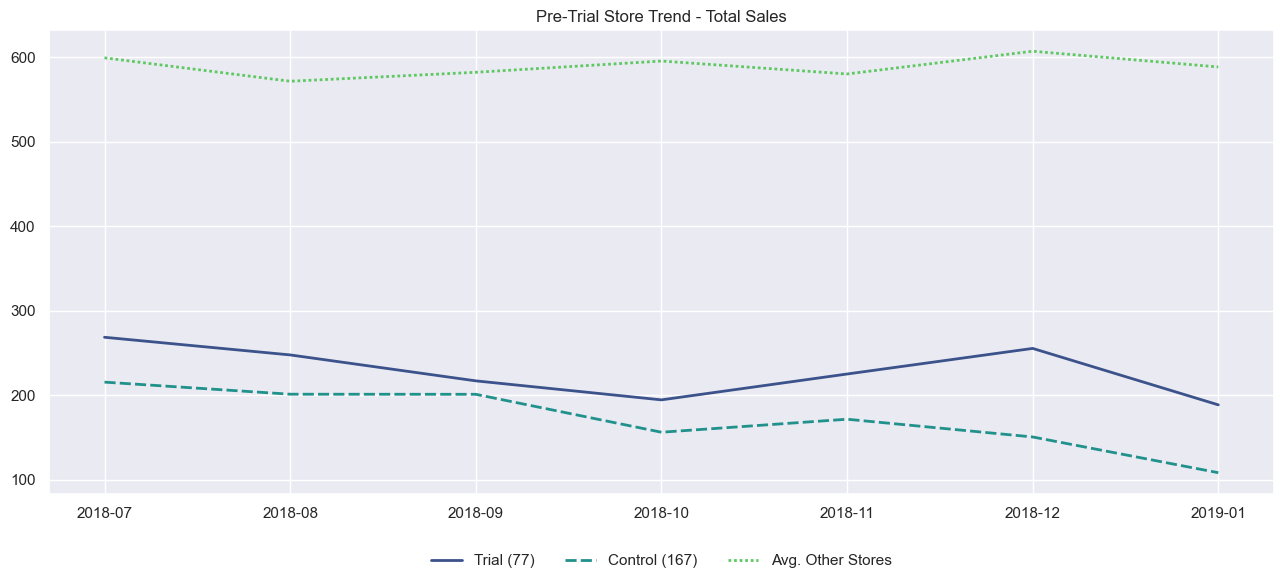

In [29]:
plot_pretrial_trends(trial_store=77, control_store=167, metric=0)

         Trial  Control  Others
2018-07     47       47    68.5
2018-08     46       34    68.2
2018-09     40       44    66.6
2018-10     36       32    67.9
2018-11     39       39    66.7
2018-12     43       36    69.4
2019-01     31       27    67.4


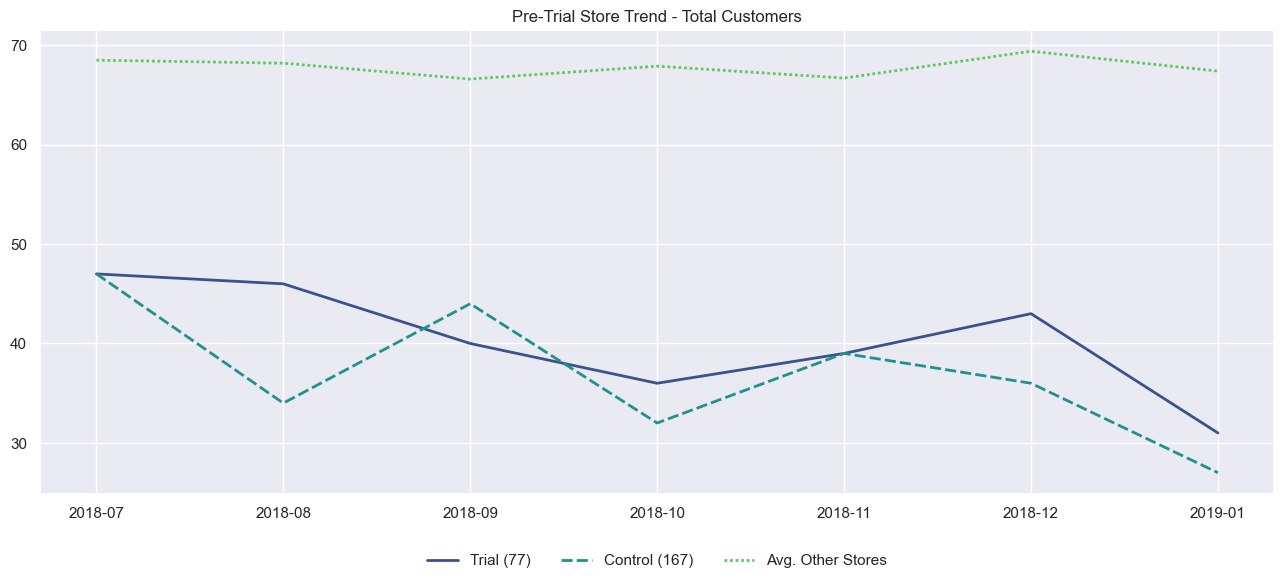

In [30]:
plot_pretrial_trends(trial_store=77, control_store=167, metric=1)

          Trial  Control  Others
2018-07  851.00    805.4   594.5
2018-08  726.85    691.3   567.6
2018-09  855.00    831.6   577.0
2018-10  898.80    771.8   590.2
2018-11  851.20    730.0   575.4
2018-12  812.20    841.4   602.1
2019-01  800.60    716.6   583.6


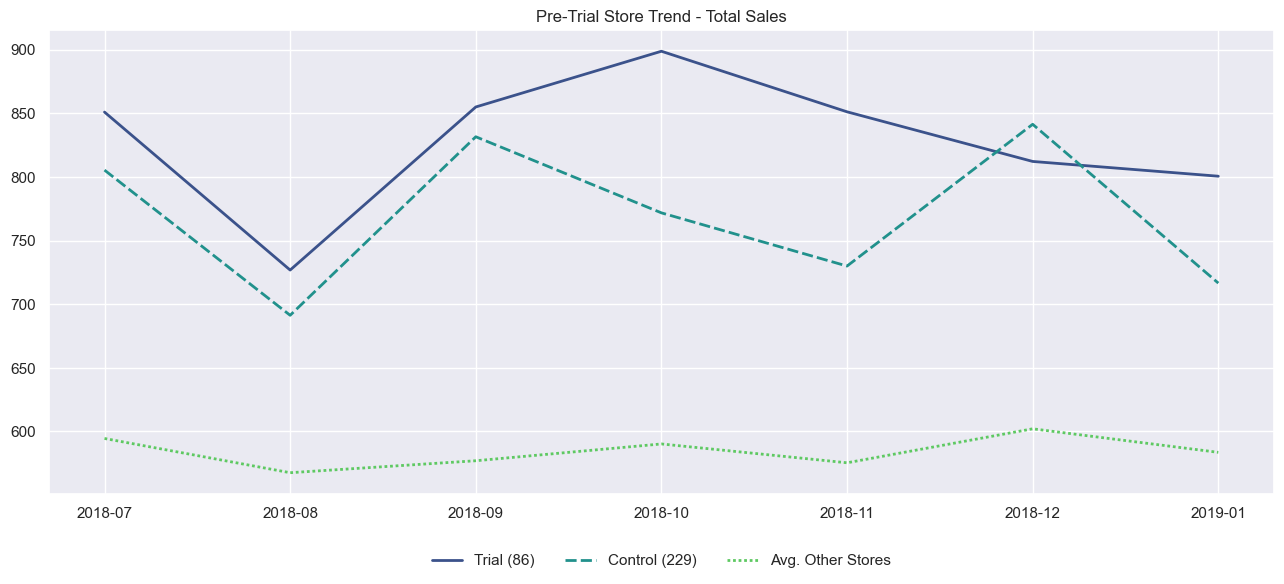

In [31]:
plot_pretrial_trends(trial_store=86, control_store=229, metric=0)

         Trial  Control  Others
2018-07     94       97    68.1
2018-08     92       90    67.8
2018-09    100       93    66.2
2018-10    105       92    67.4
2018-11     95       85    66.3
2018-12     93       90    69.0
2019-01     89       85    67.0


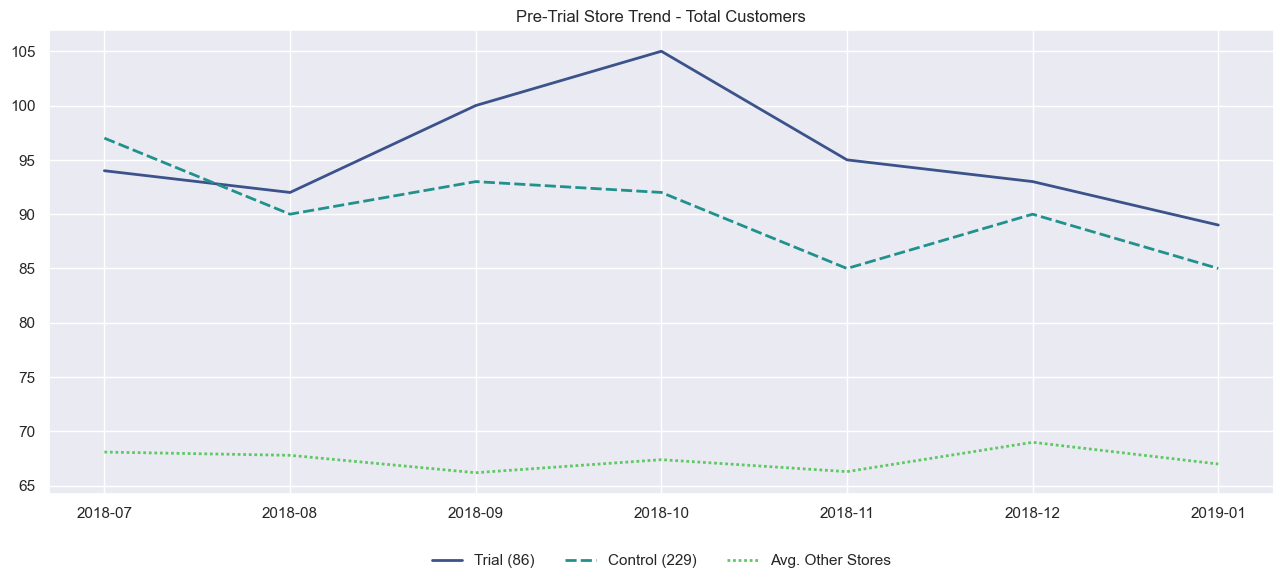

In [32]:
plot_pretrial_trends(trial_store=86, control_store=229, metric=1)

          Trial  Control  Others
2018-07  1218.2    805.4   593.1
2018-08  1242.2    691.3   565.6
2018-09  1361.8    831.6   575.1
2018-10  1270.8    771.8   588.7
2018-11  1311.4    730.0   573.6
2018-12  1213.0    841.4   600.5
2019-01  1215.4    716.6   582.0


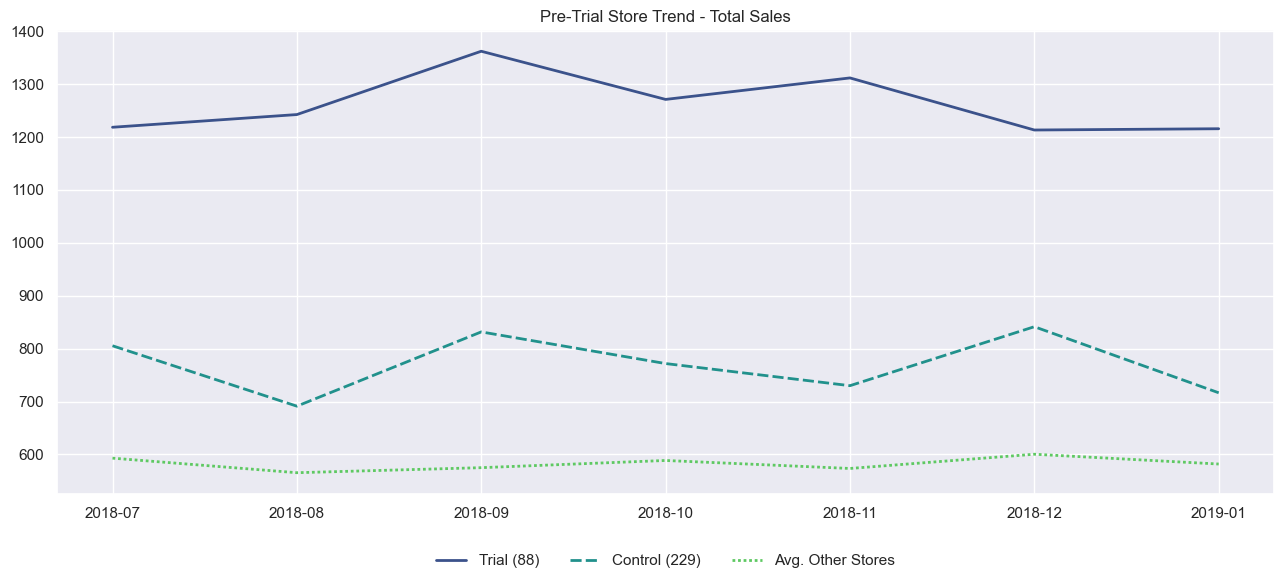

In [33]:
plot_pretrial_trends(trial_store=88, control_store=229, metric=0)

         Trial  Control  Others
2018-07    124       97    68.0
2018-08    125       90    67.7
2018-09    121       93    66.1
2018-10    120       92    67.3
2018-11    123       85    66.2
2018-12    120       90    68.9
2019-01    115       85    66.9


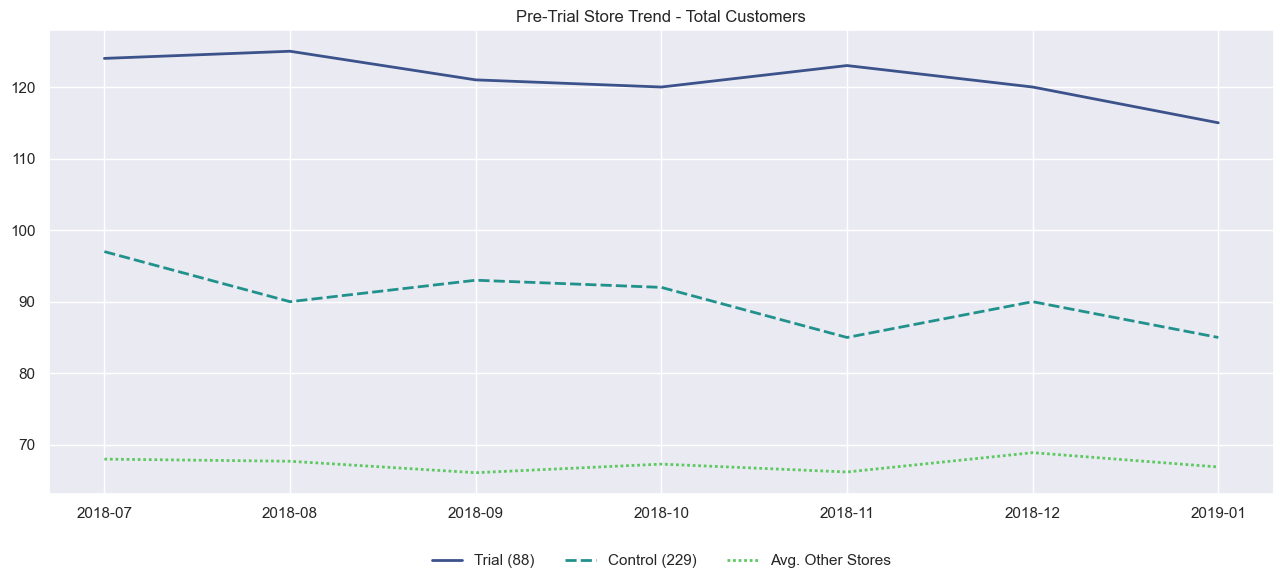

In [34]:
plot_pretrial_trends(trial_store=88, control_store=229, metric=1)

+ For trial store 88 versus control store 229, the trend is almost consistent except to the significant gap between trial and control values. This mean we should choose another control store with similarly high composite score.
+ This situation means there's a significant difference between the trial store and control store in terms of volume, and more likely the other metrics are contributing much of the composite score.

          Trial  Control  Others
2018-07  1218.2   1214.4   591.5
2018-08  1242.2    965.3   564.6
2018-09  1361.8   1211.8   573.6
2018-10  1270.8   1062.6   587.6
2018-11  1311.4   1166.4   571.9
2018-12  1213.0   1215.0   599.1
2019-01  1215.4   1123.0   580.4


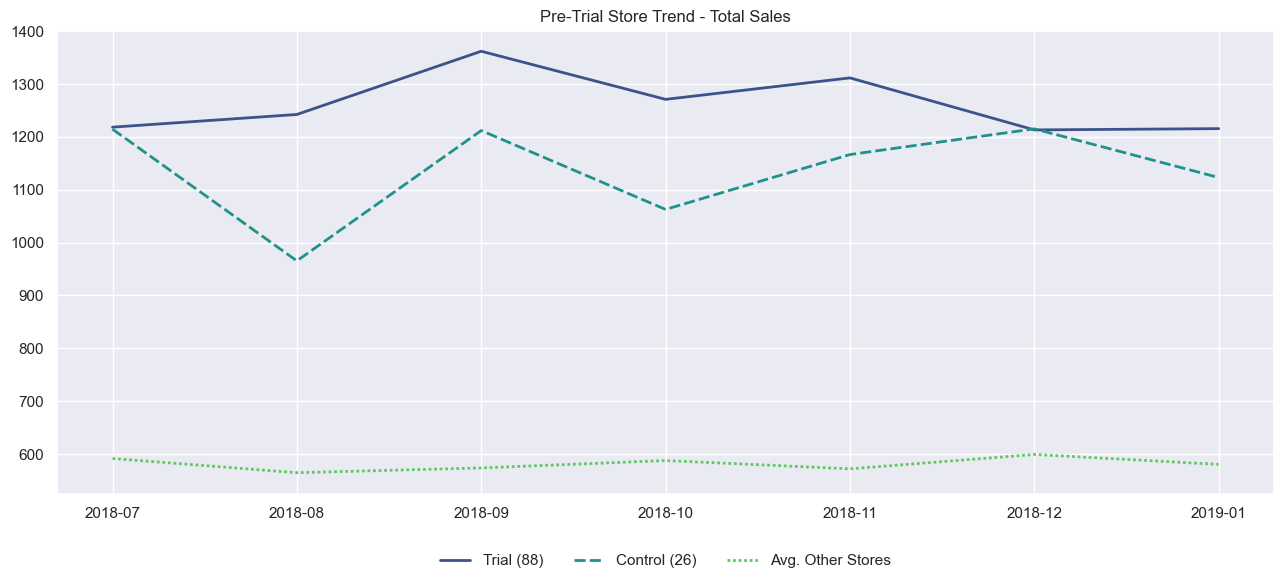

In [35]:
# Try Store 26, which also one of the top 5 stores with the highest calculated composite score

plot_pretrial_trends(trial_store=88, control_store=26, metric=0)

         Trial  Control  Others
2018-07    124      124    67.9
2018-08    125      102    67.7
2018-09    121      119    66.0
2018-10    120      103    67.3
2018-11    123      108    66.1
2018-12    120      116    68.8
2019-01    115      108    66.8


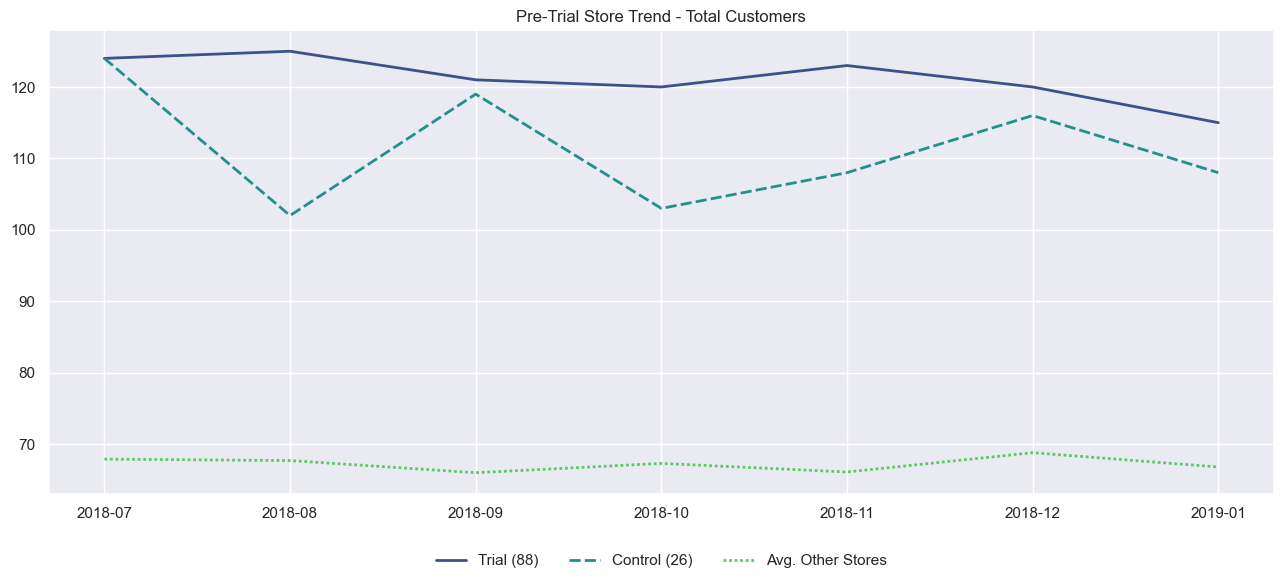

In [36]:
# Try Store 26, which also one of the top 5 stores with the highest calculated composite score

plot_pretrial_trends(trial_store=88, control_store=26, metric=1)

**Remarks**

+ Final Control Stores
    + Store 77 -> **Store 167**
    + Store 86 -> **Store 229**
    + Store 88 -> **Store 26**
+ Notice by looking at the pre-trial trends, Store 77 has monthly numbers lower than the average (other stores) while Stores 86 and 88 have monthly numbers higher than the average. This insight already shows that 77 could be situated in a location with smaller market while 86 and 88 could be situated in a relatively busy location.

## Trial assessment

Similar to checking pre-trial trends, let's only consider performance based on total sales and total customers.

In [37]:
def assess_trial(trial_store, control_store, metric=0):
    # Setup time periods
    all_months = df_main["YEARMONTH"].unique()[:10]
    pre_trial_period = all_months[:7]
    trial_period = all_months[7:]

    # Select metric to consider
    relevant_metrics = [
        monthly_sales, 
        monthly_utrans, 
        monthly_avg_units_per_trans, 
        monthly_avg_uprice
    ]
    df_metric = relevant_metrics[metric]

    # Setup working dataframe
    all_store_record = df_metric.set_index("STORE_NBR").loc[[trial_store, control_store], all_months].transpose()
    all_store_record.columns = ["trial", "control"]

    # Calculate scale factor to scale control data based on pre-trial period
    ptp_record = all_store_record.loc[pre_trial_period]
    scale_factor = ptp_record["trial"].sum() / ptp_record["control"].sum()
    all_store_record["control_scaled"] = all_store_record["control"] * scale_factor

    # Divide records for suceeding calculations
    ptp_trial_store = all_store_record.loc[pre_trial_period]["trial"]
    ptp_control_store_scaled = all_store_record.loc[pre_trial_period]["control_scaled"]

    tp_trial_store = all_store_record.loc[trial_period]["trial"]
    tp_control_store_scaled = all_store_record.loc[trial_period]["control_scaled"]

    # Calculate standard deviation based on percentage difference during pre-trial period 
    ptp_pct_diff = ((ptp_trial_store - ptp_control_store_scaled).abs()).div(ptp_control_store_scaled)
    ptp_pct_diff_stdev = ptp_pct_diff.std()

    # Calculate confidence interval for control store
    # There are 8 months during the pre-trial period, hence use 7 degrees of freedom
    # The 5th and 95th percentile have equal magnitude but opposite signs because the t distribution is symmetric
    llimit_t, ulimit_t = t.ppf(0.05, df=7), t.ppf(0.95, df=7)
    tp_control_scaled_llimit = all_store_record["control_scaled"] * (1 + ptp_pct_diff_stdev * llimit_t)
    tp_control_scaled_ulimit = all_store_record["control_scaled"] * (1 + ptp_pct_diff_stdev * ulimit_t)

    # Collate results into dataframe
    df_result = pd.DataFrame({
        "actual":  all_store_record["trial"],
        "control_scaled": all_store_record["control_scaled"],
        "control_lower_limit": tp_control_scaled_llimit,
        "control_upper_limit": tp_control_scaled_ulimit
    })

    return df_result

In [38]:
def plot_trial_result(trial_store, control_store, metric=0):
    # Get dataframe of result
    df_result = assess_trial(trial_store, control_store, metric=metric)
    
    # Ensure period index will be read properly
    df_result.index = df_result.index.astype(str)
    
    # Draw plot
    fig, ax = plt.subplots(figsize=(13, 6))

    # Trial store plot
    ax.plot(
        df_result.index, 
        df_result["actual"], 
        color="darkblue", 
        linewidth=3, 
        linestyle="-", 
        label=f"Trial ({trial_store})",
        zorder=2
    )
    # Scaled control store plot
    ax.plot(
        df_result.index, 
        df_result["control_scaled"], 
        color="darkslategray", 
        linewidth=1.5, 
        linestyle="--", 
        label=f"Scaled Control ({control_store})",
        zorder=1
    )
    # Lower and upper limits plot
    ax.plot(
        df_result.index, 
        df_result["control_upper_limit"], 
        color="darkslategray", 
        linewidth=1.5, 
        linestyle=":", 
        label="90% Confidence Interval",
        zorder=1
    )
    ax.plot(
        df_result.index, 
        df_result["control_lower_limit"], 
        color="darkslategray", 
        linewidth=1.5, 
        linestyle=":", 
        label="",
        zorder=1
    )

    # Shade region of trial period
    ax.axvspan(xmin="2019-02", xmax="2019-04", color="lightgreen", alpha=0.5, label="Trial Period", zorder=0)

    # Setup layout of legend
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        ncol=4,
        frameon=False
    )

    # Setup labels
    plot_title_mapper = {
        0: "Total Sales",
        1: "Total Customers",
        2: "Avg Units per Transaction",
        3: "Avg Sales per Unit"
    }
    ax.set_title(f"Trial Assessment of Store {trial_store} by {plot_title_mapper.get(metric, "NaN")}")

    fig.tight_layout()

    metric_name = plot_title_mapper.get(metric, "NaN").replace(" ", "_").lower()
    fig.savefig(f"./static/assessment/ta_{metric_name}_ts{trial_store}_cs{control_store}.jpg", bbox_inches="tight", dpi=200)

### Store 77

In [56]:
TRIAL_STORE = 77
CONTROL_STORE = 167

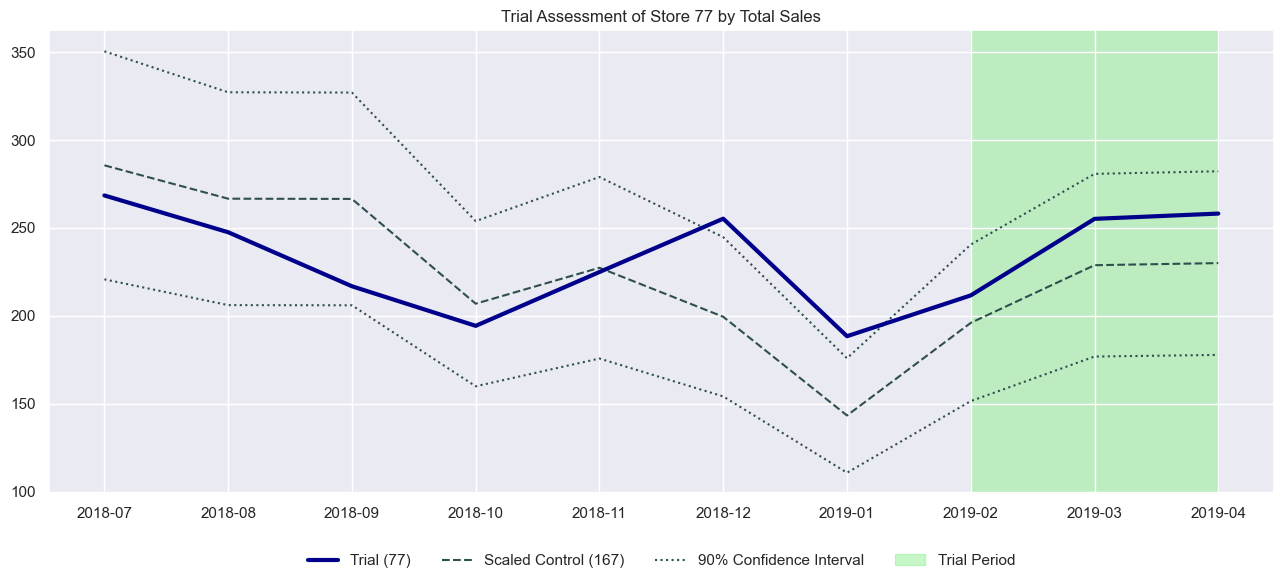

In [57]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=0)

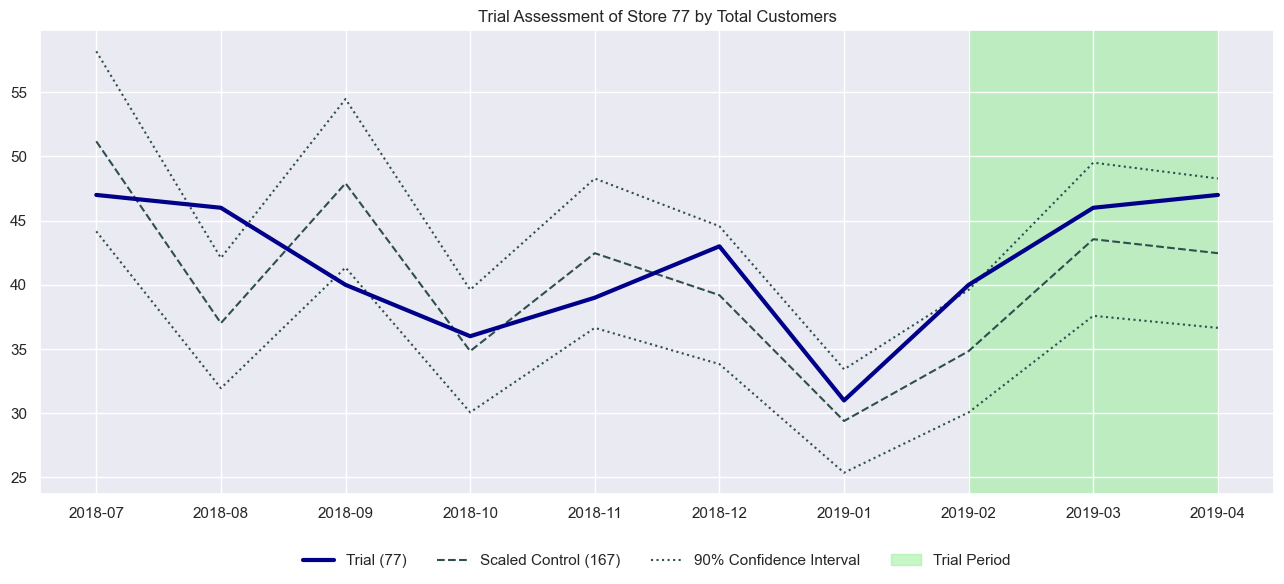

In [58]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=1)

### Store 86

In [59]:
TRIAL_STORE = 86
CONTROL_STORE = 229

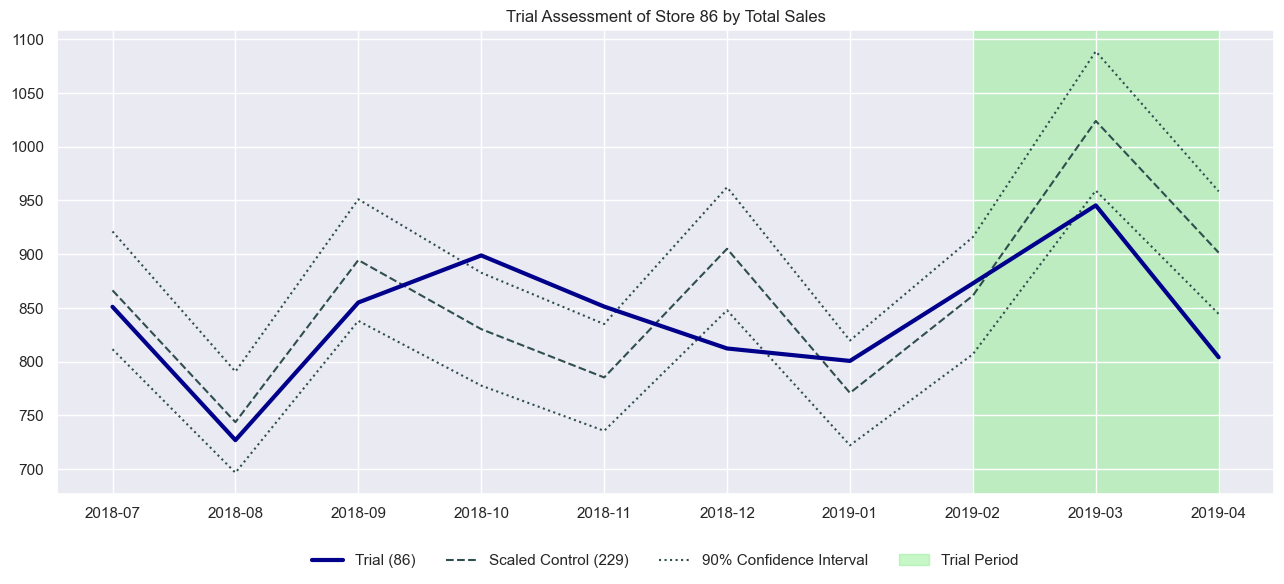

In [60]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=0)

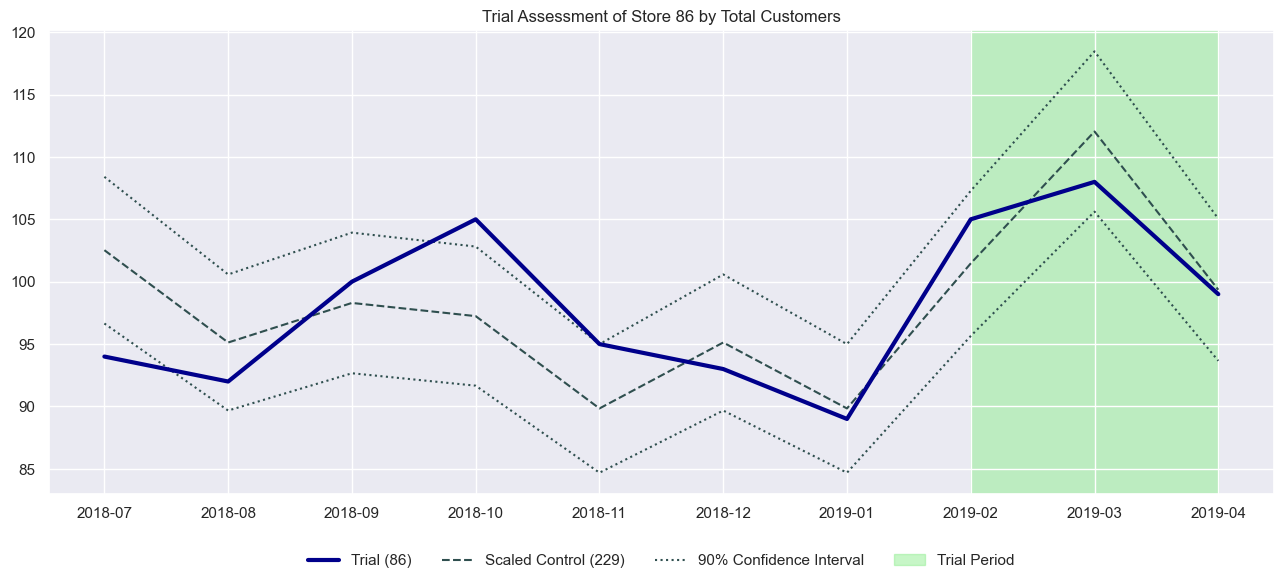

In [61]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=1)

### Store 88

In [62]:
TRIAL_STORE = 88
CONTROL_STORE = 26

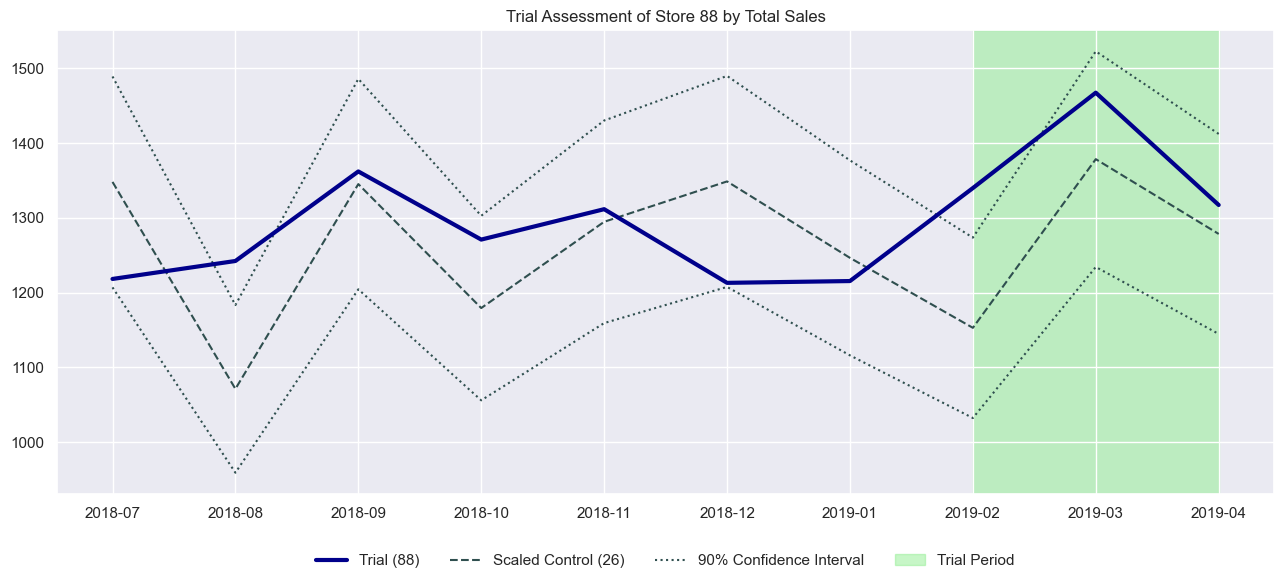

In [63]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=0)

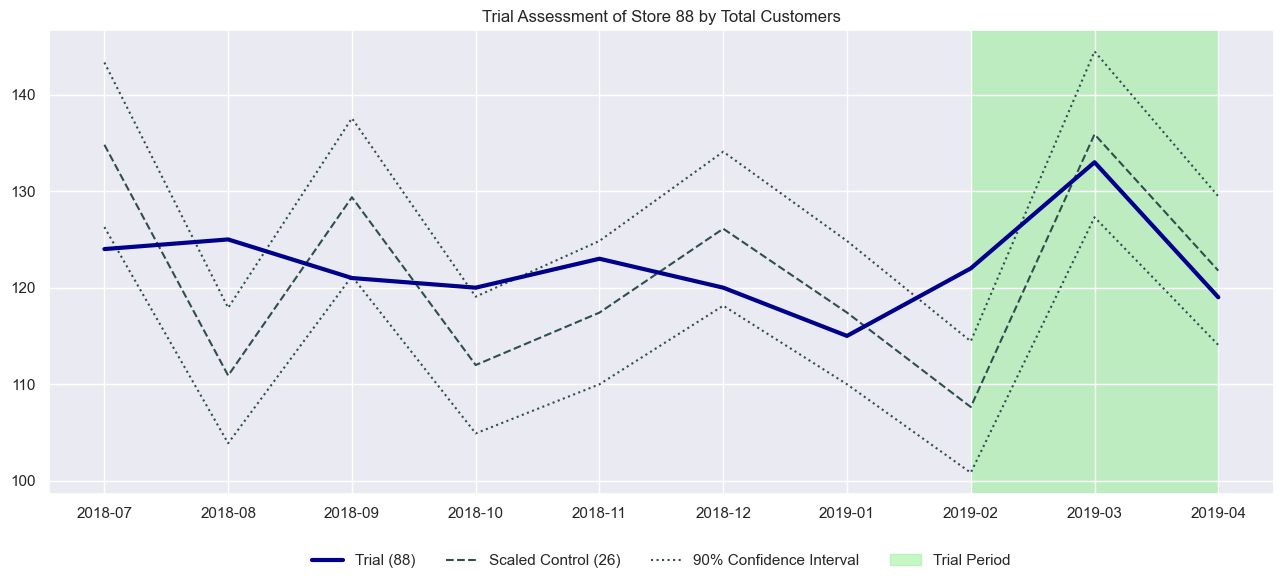

In [64]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=1)

**Remarks**
+ Store 77 - Even though the new layout seems to attract more customers and create more sales, its more likely not so significant.
+ Store 86 - The new layout didn't helped in creating more sales.
+ Store 88 - The new layout did create more sales within its existing customers, but its more likely not so significant.
+ Since our conclusion highly depends on our chosen approach and metric, additional exploration and tweaks could be done to get more confidence in giving a conclusion to the result of the new layout in sales.

## Comparison to Example Answer

Consider Store 